# Практическая работа №8

По теме: "Ассоциативные правила"

Выполнил: студент группы ИВБО-07-21 Чан Минь Ханг

Принял: старший преподаватель кафедры ПМ Юрченков И.А.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import time
import warnings
warnings.filterwarnings(action='ignore')

## Market_Basket_Optimisation.csv.  

### 1. 
Загрузить данные Market_Basket_Optimisation.csv.  

In [2]:
data = pd.read_csv('Market_Basket_Optimisation.csv')

data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

### 2. 
Визуализировать данные (отразить на гистограммах относительную и 
фактическую частоту встречаемости для 20 наиболее популярных 
товаров).

<AxesSubplot:>

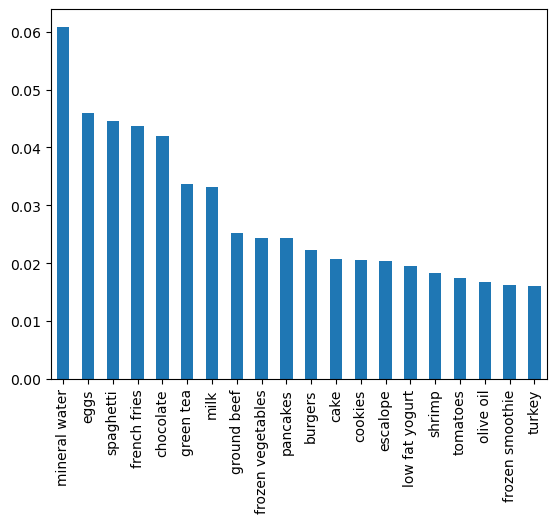

In [4]:
data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<AxesSubplot:>

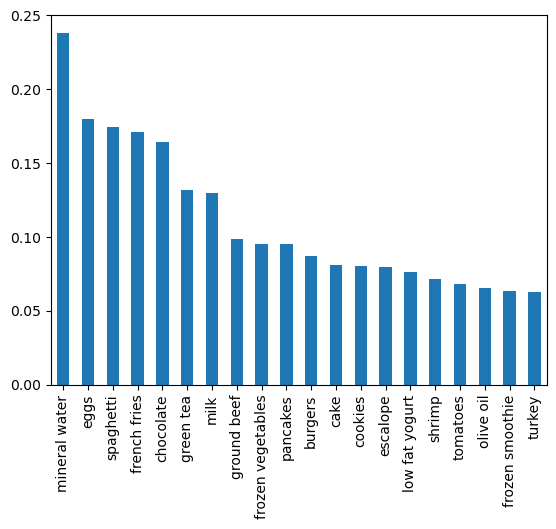

In [5]:
data.stack().value_counts().apply(lambda item: item / data.shape[0]).head(20).plot(kind='bar')

### 3.
Применить алгоритм Apriori, используя 3 разные библиотеки 
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для 
алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [6]:
def clean(data):
    for i in range(data.shape[0]):
        row = data.iloc[i].dropna().tolist()
        transactions.append(row)
    
transactions = []
clean(data)
transactions[:10]

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food']]

In [7]:
t = [0] * 4

min_support = 0.01
min_confidence = 0.435

In [8]:
def algorithm1(min_support, min_confidence):
    # !pip3 install apriori_python
    from apriori_python import apriori

    start = time.perf_counter()
    t1, rules = apriori(transactions, 
                        minSup=min_support, 
                        minConf=min_confidence)
    t[0] = (time.perf_counter() - start)

    for i in range(len(rules)):
        print(rules[i])
        
algorithm1(min_support, min_confidence)

[{'ground beef', 'spaghetti'}, {'mineral water'}, 0.43537414965986393]
[{'milk', 'chocolate'}, {'mineral water'}, 0.43568464730290457]
[{'milk', 'spaghetti'}, {'mineral water'}, 0.44360902255639095]
[{'spaghetti', 'olive oil'}, {'mineral water'}, 0.4476744186046512]
[{'spaghetti', 'pancakes'}, {'mineral water'}, 0.455026455026455]
[{'soup'}, {'mineral water'}, 0.45646437994722955]
[{'milk', 'frozen vegetables'}, {'mineral water'}, 0.4689265536723164]
[{'ground beef', 'chocolate'}, {'mineral water'}, 0.47398843930635837]
[{'milk', 'ground beef'}, {'mineral water'}, 0.503030303030303]
[{'eggs', 'ground beef'}, {'mineral water'}, 0.5066666666666667]


In [9]:
def algorithm2(min_support, min_confidence):
    # !pip3 install apyori
    from apyori import apriori

    start = time.perf_counter()
    rules = apriori(transactions=transactions, 
                    min_support=min_support, 
                    min_confidence=min_confidence, 
                    min_lift=1.0001)
    t[1] = (time.perf_counter() - start)

    results = list(rules)
    for result in results:
        for subset in result[2]:
            print(subset[0], subset[1])
            print(f"Support: {result[1]:.15f}\t Confidence: {subset[2]:.15f}\t Lift: {subset[3]:.15f}\n")

algorithm2(min_support, min_confidence)

frozenset({'soup'}) frozenset({'mineral water'})
Support: 0.023066666666667	 Confidence: 0.456464379947230	 Lift: 1.915771040629111

frozenset({'ground beef', 'chocolate'}) frozenset({'mineral water'})
Support: 0.010933333333333	 Confidence: 0.473988439306358	 Lift: 1.989319135309283

frozenset({'milk', 'chocolate'}) frozenset({'mineral water'})
Support: 0.014000000000000	 Confidence: 0.435684647302905	 Lift: 1.828558956223718

frozenset({'eggs', 'ground beef'}) frozenset({'mineral water'})
Support: 0.010133333333333	 Confidence: 0.506666666666667	 Lift: 2.126468942361500

frozenset({'milk', 'frozen vegetables'}) frozenset({'mineral water'})
Support: 0.011066666666667	 Confidence: 0.468926553672316	 Lift: 1.968074511775251

frozenset({'milk', 'ground beef'}) frozenset({'mineral water'})
Support: 0.011066666666667	 Confidence: 0.503030303030303	 Lift: 2.111207203540724

frozenset({'spaghetti', 'ground beef'}) frozenset({'mineral water'})
Support: 0.017066666666667	 Confidence: 0.4353741

In [10]:
def algorithm3(min_support, min_confidence):
    # !pip3 install efficient_apriori
    from efficient_apriori import apriori

    start = time.perf_counter()
    itemsets, rules = apriori(transactions, 
                              min_support=min_support, 
                              min_confidence=min_confidence)
    t[2] = (time.perf_counter() - start)

    for i in range(len(rules)):
        print(rules[i])

algorithm3(min_support, min_confidence)

{soup} -> {mineral water} (conf: 0.456, supp: 0.023, lift: 1.916, conv: 1.401)
{chocolate, ground beef} -> {mineral water} (conf: 0.474, supp: 0.011, lift: 1.989, conv: 1.448)
{chocolate, milk} -> {mineral water} (conf: 0.436, supp: 0.014, lift: 1.829, conv: 1.350)
{eggs, ground beef} -> {mineral water} (conf: 0.507, supp: 0.010, lift: 2.126, conv: 1.544)
{frozen vegetables, milk} -> {mineral water} (conf: 0.469, supp: 0.011, lift: 1.968, conv: 1.434)
{ground beef, milk} -> {mineral water} (conf: 0.503, supp: 0.011, lift: 2.111, conv: 1.533)
{ground beef, spaghetti} -> {mineral water} (conf: 0.435, supp: 0.017, lift: 1.827, conv: 1.349)
{milk, spaghetti} -> {mineral water} (conf: 0.444, supp: 0.016, lift: 1.862, conv: 1.369)
{olive oil, spaghetti} -> {mineral water} (conf: 0.448, supp: 0.010, lift: 1.879, conv: 1.379)
{pancakes, spaghetti} -> {mineral water} (conf: 0.455, supp: 0.011, lift: 1.910, conv: 1.398)


### 4.
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать 
гиперпараметры для алгоритма так, чтобы выводилось порядка 10 
наилучших правил. 

In [11]:
def algorithm4(min_support, min_confidence):
    # !pip3 install fpgrowth_py
    from fpgrowth_py import fpgrowth

    start = time.perf_counter()
    itemsets, rules = fpgrowth(transactions, 
                               minSupRatio=min_support, 
                               minConf=min_confidence)
    t[3] = (time.perf_counter() - start)

    for i in range(len(rules)):
        print(rules[i])
    
algorithm4(min_support, min_confidence)

[{'soup'}, {'mineral water'}, 0.45646437994722955]
[{'spaghetti', 'olive oil'}, {'mineral water'}, 0.4476744186046512]
[{'spaghetti', 'pancakes'}, {'mineral water'}, 0.455026455026455]
[{'milk', 'frozen vegetables'}, {'mineral water'}, 0.4689265536723164]
[{'eggs', 'ground beef'}, {'mineral water'}, 0.5066666666666667]
[{'milk', 'ground beef'}, {'mineral water'}, 0.503030303030303]
[{'ground beef', 'chocolate'}, {'mineral water'}, 0.47398843930635837]
[{'ground beef', 'spaghetti'}, {'mineral water'}, 0.43537414965986393]
[{'milk', 'chocolate'}, {'mineral water'}, 0.43568464730290457]
[{'milk', 'spaghetti'}, {'mineral water'}, 0.44360902255639095]


### 5.
Сравнить время выполнения всех алгоритмов и построить гистограмму 

Время выполнения apriori_python: 11.6145468
Время выполнения apyori: 6.900000002474371e-06
Время выполнения efficient_apriori: 0.08775149999999954
Время выполнения fpgrowth: 3.9418185


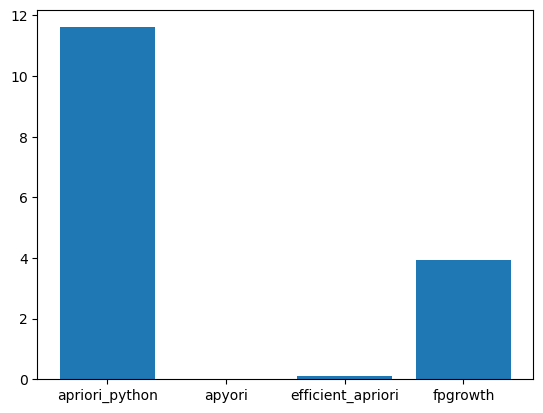

In [12]:
def compare(t):
    algorithms = ['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth']

    for i, algorithm in enumerate(algorithms):
        print(f"Время выполнения {algorithm}: {t[i]}")

    plt.bar(algorithms, t)
    plt.show()
    
compare(t)

## data.csv

### 6.
Загрузить данные data.csv.

In [13]:
data = pd.read_csv('data.csv')

data

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


### 7. 
Визуализировать данные (отразить на гистограммах относительную и 
фактическую частоту встречаемости для 20 наиболее популярных 
товаров).

<AxesSubplot:>

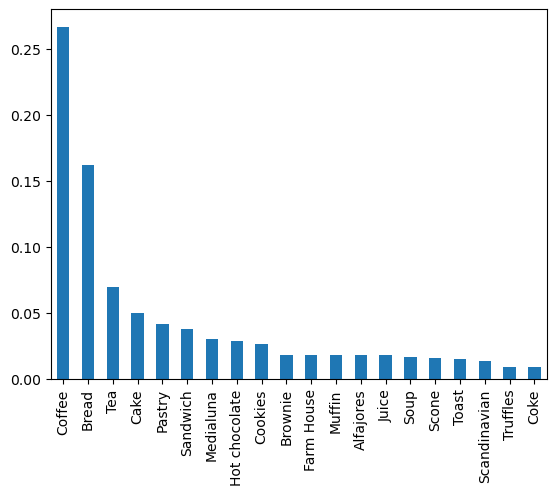

In [15]:
data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<AxesSubplot:>

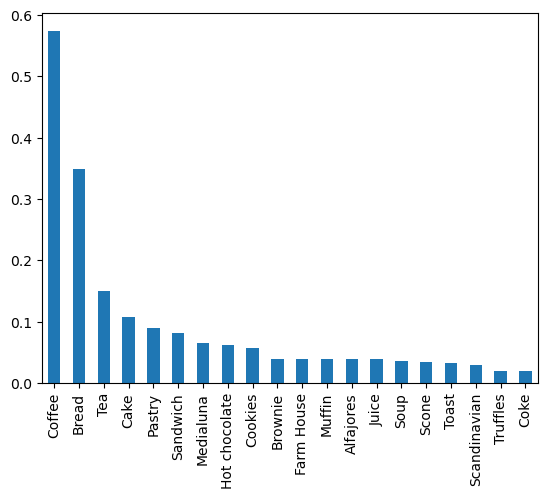

In [16]:
data.stack().value_counts().apply(lambda item: item / data.shape[0]).head(20).plot(kind='bar')

### 8. 
Применить алгоритм Apriori, используя 3 разные библиотеки 
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для 
алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [17]:
transactions = []
clean(data)
transactions[:10]

[['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread']]

In [18]:
t = [0] * 4

min_support = 0.017
min_confidence = 0.5

In [19]:
algorithm1(min_support, min_confidence)

[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]


In [20]:
algorithm2(min_support, min_confidence)

frozenset({'Alfajores'}) frozenset({'Coffee'})
Support: 0.019517313746065	 Confidence: 0.540697674418605	 Lift: 1.137996651327143

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.054354669464848	 Confidence: 0.526958290946083	 Lift: 1.109079618532724

frozenset({'Cookies'}) frozenset({'Coffee'})
Support: 0.028016789087093	 Confidence: 0.518446601941748	 Lift: 1.091165220076160

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Support: 0.029380902413431	 Confidence: 0.507246376811594	 Lift: 1.067592308086240

frozenset({'Juice'}) frozenset({'Coffee'})
Support: 0.020461699895068	 Confidence: 0.534246575342466	 Lift: 1.124419139358149

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116	 Confidence: 0.569230769230769	 Lift: 1.198049741777657

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.047219307450157	 Confidence: 0.552147239263804	 Lift: 1.162094344121919

frozenset({'Sandwich'}) frozenset({'Coffee'})
Support: 0.037985309548793	 Confidence: 0.53235

In [21]:
algorithm3(min_support, min_confidence)

{Alfajores} -> {Coffee} (conf: 0.541, supp: 0.020, lift: 1.138, conv: 1.143)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Juice} -> {Coffee} (conf: 0.534, supp: 0.020, lift: 1.124, conv: 1.127)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Scone} -> {Coffee} (conf: 0.523, supp: 0.018, lift: 1.101, conv: 1.100)
{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.483, conv: 1.776)


### 9. 
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать 
гиперпараметры для алгоритма так, чтобы выводилось порядка 10 
наилучших правил.

In [22]:
algorithm4(min_support=0.021, min_confidence=min_confidence)

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Scone'}, {'Coffee'}, 0.5229357798165137]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]


### 10. 
Сравнить время выполнения всех алгоритмов и построить гистограмму. 

Время выполнения apriori_python: 1.4064408999999998
Время выполнения apyori: 2.69999999957804e-06
Время выполнения efficient_apriori: 0.020385200000003323
Время выполнения fpgrowth: 0.4810717000000011


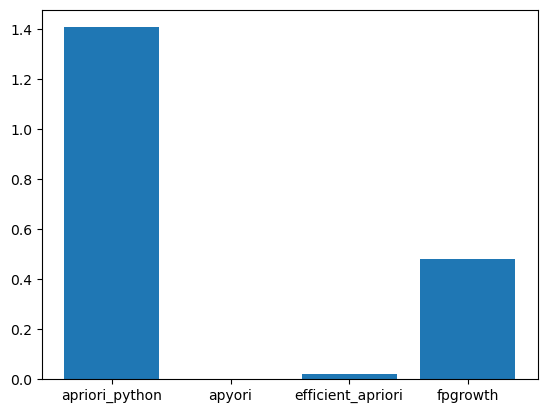

In [23]:
compare(t)

## Выводы

### 11. 
Сформулировать выводы и сделать отчет.

*Самый быстрый алгоритм: apriori из библиотеки apyori*

*Самый медленный алгоритм: apriori из библиотеки apriori_python*